In [74]:
# Model design
import agentpy as ap
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import IPython

import random 

In [96]:
class Guest(ap.Agent):

    def setup(self):
        # Initialize an attribute with a parameter
        self.random = random.Random()  # Create agent generator
        self.velocity = self.random.randrange(2, 5, 1)
        self.location = self.model.nprandom.random(self.p.ndim)
        self.target = None
    
    def setup_pos(self, space):
        self.space = space
        self.pos = space.positions[self]

    def update_position(self):
        delta_dist = calc_next_pos(self.pos, [50, 50], self.velocity)
        self.space.move_by(self, delta_dist)
    
class FestivalModel(ap.Model):

    def setup(self):
        """ Initializes the agents and state space of the model. """

        self.space = ap.Space(self, shape=[self.p.size]*self.p.ndim)
        self.guests = ap.AgentList(self, self.p.guests, Guest)
        self.space.add_agents(self.guests, random=True)
        self.guests.setup_pos(self.space)

    def step(self):
        """
            Defines the models' events per simulation step. 
            Call a method for every agent. 
        """
        self.guests.update_position()

    # def update(self):
    #     """ Record a dynamic variable. """
    #     self.agents.record('test')

    def end(self):
        """ Repord an evaluation measure. """
        # self.report('my_measure', 1)
        pass

In [86]:
def calc_next_pos(pos, goal, v):
    # dist = np.hypot((goal[0] - pos[0]), (goal[1] - pos[1]))
    return [(goal[0] - pos[0])/v, (goal[1] - pos[1])/v]
    

In [53]:
def animation_plot_single(m, ax):
    ndim = m.p.ndim
    ax.set_title(f"Festival Simulation {ndim}D t={m.t}")
    pos = m.space.positions.values()
    pos = np.array(list(pos)).T  # Transform
    ax.scatter(*pos, s=10, c='black')
    ax.set_xlim(0, m.p.size)
    ax.set_ylim(0, m.p.size)
    if ndim == 3:
        ax.set_zlim(0, m.p.size)
    ax.set_axis_off()

def animation_plot(m, p):
    projection = '3d' if p['ndim'] == 3 else None
    fig = plt.figure(figsize=(7,7))
    fig.patch.set_facecolor('white')
    ax = fig.add_subplot(111, projection=projection)
    animation = ap.animate(m(p), fig, ax, animation_plot_single)
    return IPython.display.HTML(animation.to_jshtml(fps=20))

In [92]:
parameters = {
    'guests': 50,
    'steps': 20,
    'size': 100,
    'ndim': 2,
    'seed': 42
}

# model = FestivalModel(parameters)
# results = model.run()

ValueError: empty range for randrange() (12, 5, -7)

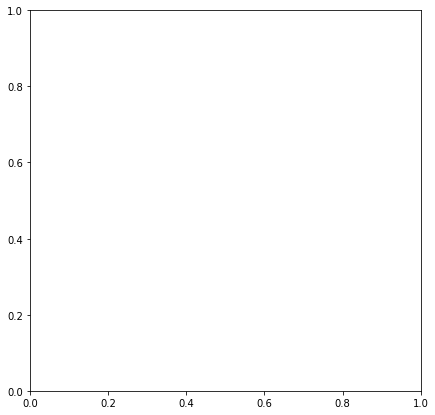

In [97]:
animation_plot(FestivalModel, parameters)